<a href="https://colab.research.google.com/github/rvprieto/Assigment-18---Data-Expert-/blob/main/Assignment_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content
1. Preprocessing data 
* Create dummy data (Object data type)
* Scaling data (numberic data) by MinMaxScaler
2. The model
* Decision Tree
* Random Forest
* Support Vector Machine
* K-Nearest Neighbor
* Logistic Regression
* Artificial Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("/content/heart.csv")

# Preprocessing data

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


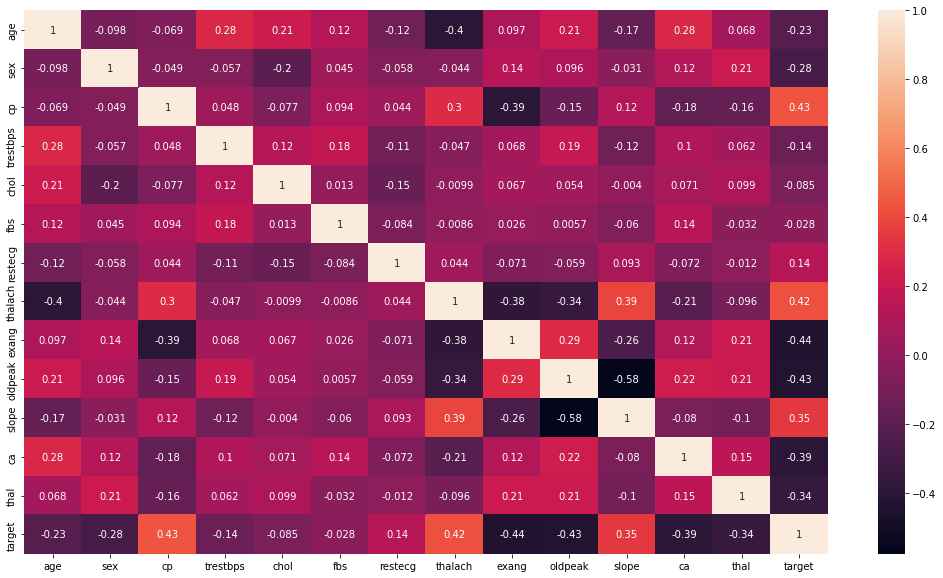

In [72]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True)


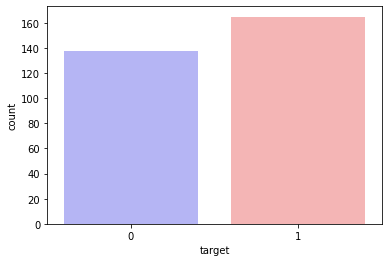

In [6]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

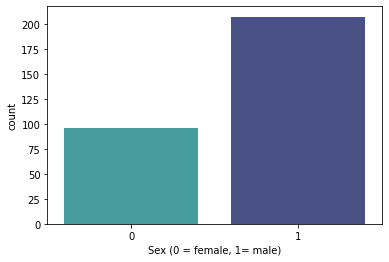

In [7]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

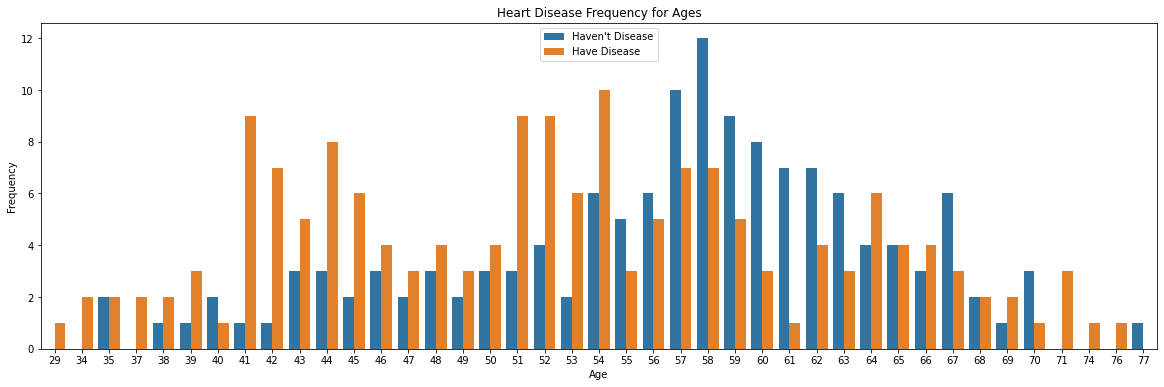

In [8]:
plt.figure(figsize=(20,6))
sns.countplot(x='age', data=data, hue='target')
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])

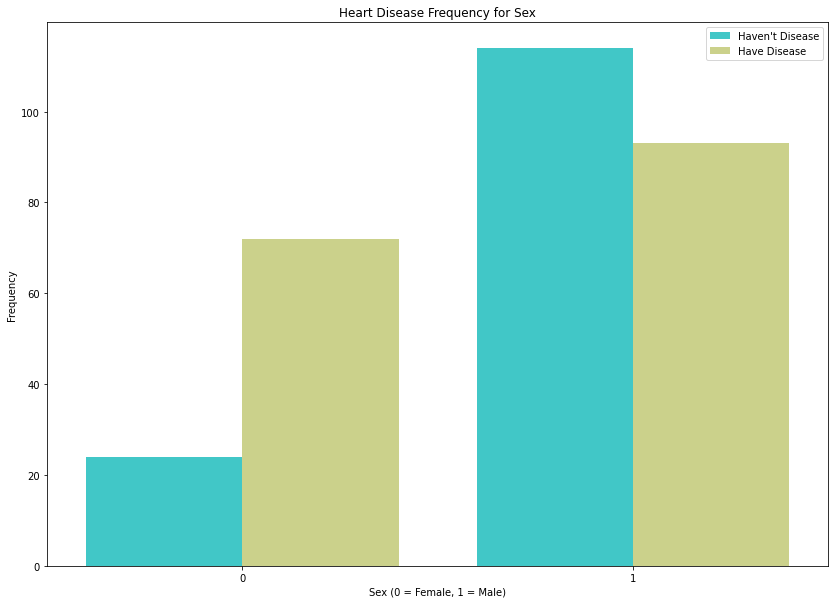

In [9]:
plt.figure(figsize=(14,10))

sns.countplot(x='sex', data=data, hue='target', palette='rainbow')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])

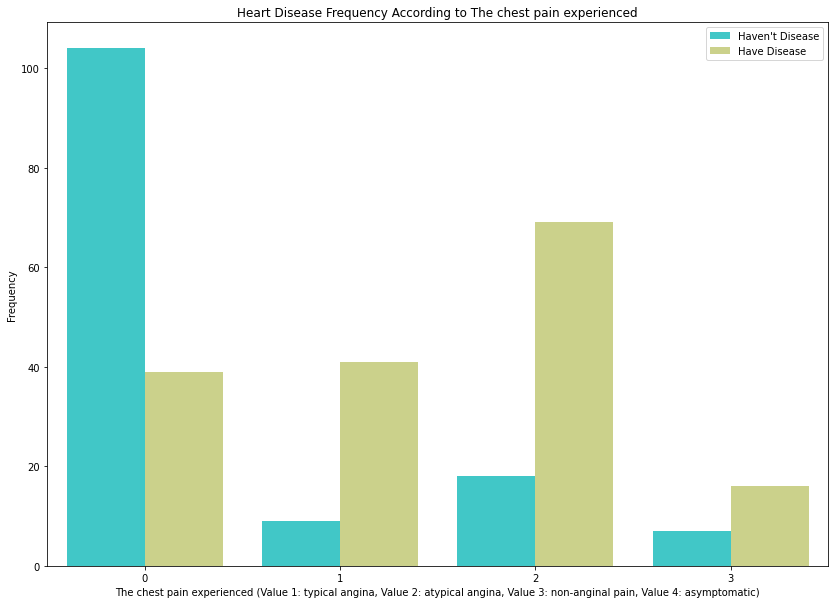

In [10]:
plt.figure(figsize=(14,10))
sns.countplot(x='cp',data=data, hue='target',palette='rainbow')
plt.title('Heart Disease Frequency According to The chest pain experienced')
plt.xlabel('The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])

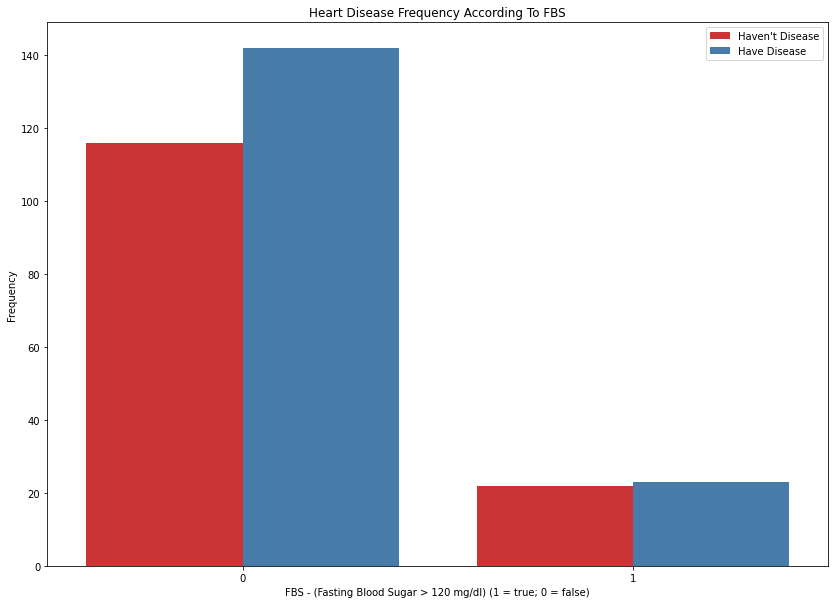

In [11]:
plt.figure(figsize=(14,10))
sns.countplot(x='fbs',data=data, hue='target',palette='Set1')
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

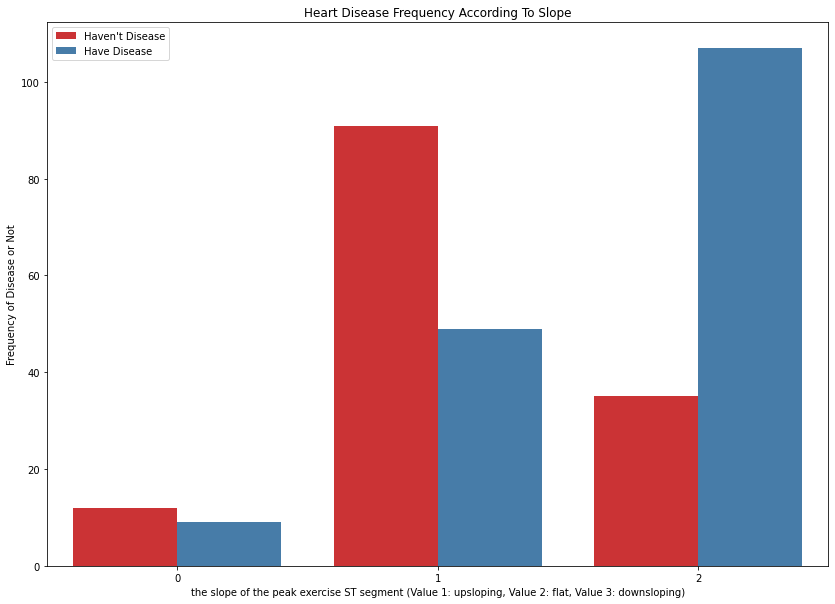

In [12]:
plt.figure(figsize=(14,10))
sns.countplot(x='slope',data=data, hue='target',palette='Set1')
plt.title('Heart Disease Frequency According To Slope')
plt.xlabel('the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

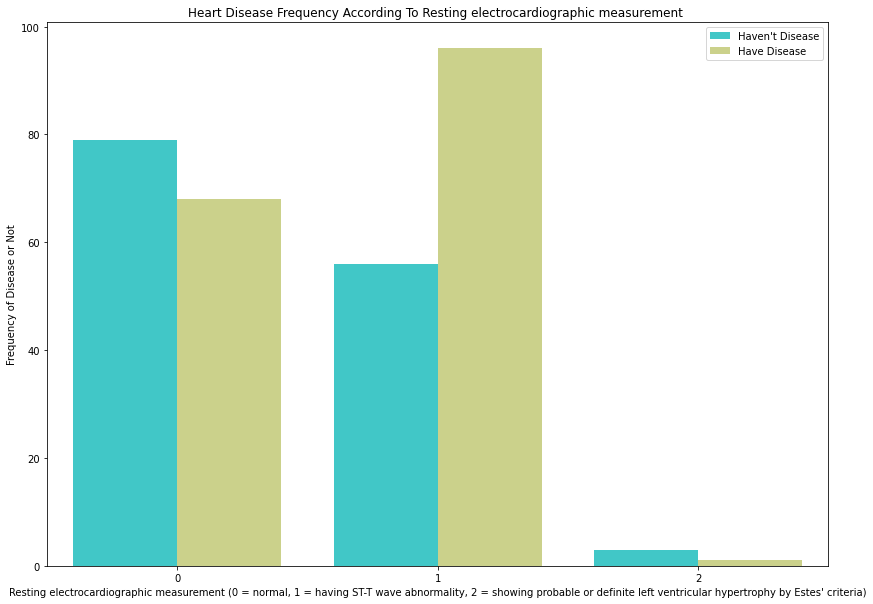

In [13]:
plt.figure(figsize=(14,10))
sns.countplot(x='restecg',data=data, hue='target',palette='rainbow')
plt.title('Heart Disease Frequency According To Resting electrocardiographic measurement ')
plt.xlabel("Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)")
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

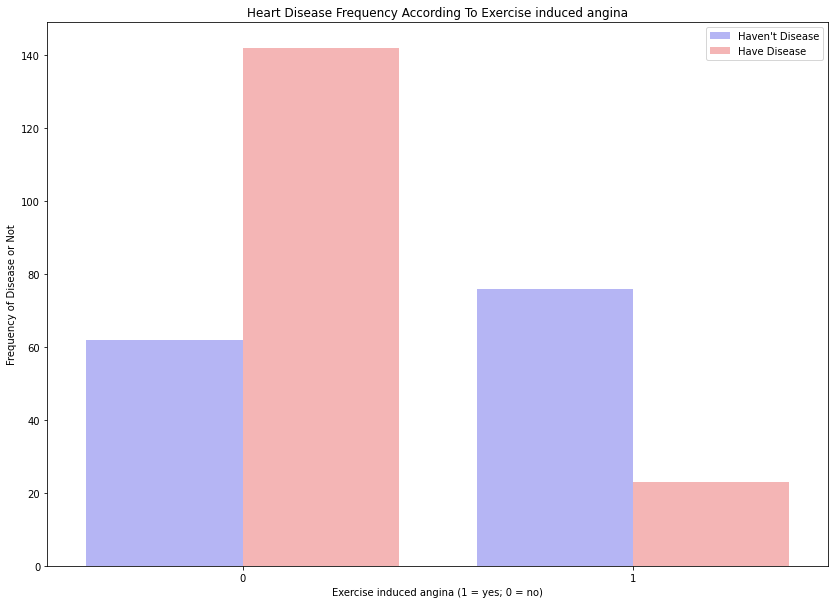

In [14]:
plt.figure(figsize=(14,10))
sns.countplot(x='exang',data=data, hue='target',palette='bwr')
plt.title('Heart Disease Frequency According To Exercise induced angina')
plt.xlabel("Exercise induced angina (1 = yes; 0 = no)")
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

**Create dummy data**

In [15]:
df_cp=pd.get_dummies(data['cp'], prefix = "cp", drop_first=True)
df_thal=pd.get_dummies(data['thal'], prefix = "thal", drop_first=True)
df_slope=pd.get_dummies(data['slope'], prefix = "slope", drop_first=True)
df_sex=pd.get_dummies(data['sex'], prefix = "sex", drop_first=True)
df_fbs=pd.get_dummies(data['fbs'], prefix = "fbs", drop_first=True)
df_restecg=pd.get_dummies(data['restecg'], prefix = "restecg", drop_first=True)
df_exang=pd.get_dummies(data['exang'], prefix = "exang", drop_first=True)


In [16]:
df_num=data.drop(['cp','thal','slope','sex','fbs','restecg','exang'], axis=1)

In [17]:
frames = [df_num,df_cp, df_thal, df_slope, df_sex,df_fbs,df_restecg,df_exang]
df= pd.concat(frames, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    int64  
 3   thalach    303 non-null    int64  
 4   oldpeak    303 non-null    float64
 5   ca         303 non-null    int64  
 6   target     303 non-null    int64  
 7   cp_1       303 non-null    uint8  
 8   cp_2       303 non-null    uint8  
 9   cp_3       303 non-null    uint8  
 10  thal_1     303 non-null    uint8  
 11  thal_2     303 non-null    uint8  
 12  thal_3     303 non-null    uint8  
 13  slope_1    303 non-null    uint8  
 14  slope_2    303 non-null    uint8  
 15  sex_1      303 non-null    uint8  
 16  fbs_1      303 non-null    uint8  
 17  restecg_1  303 non-null    uint8  
 18  restecg_2  303 non-null    uint8  
 19  exang_1    303 non-null    uint8  
dtypes: float64

**Scaling data using MinMaxScaler**

In [18]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df[['age','trestbps','chol','thalach','oldpeak','ca']]= pd.DataFrame(scale.fit_transform(df[['age','trestbps','chol','thalach','oldpeak','ca']].values), columns=['age','trestbps','chol','thalach','oldpeak','ca'], index=df.index)

In [19]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2,sex_1,fbs_1,restecg_1,restecg_2,exang_1
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.00,1,0,0,1,1,0,0,0,0,1,1,0,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.00,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.00,1,1,0,0,0,1,0,0,1,0,0,0,0,0
3,0.562500,0.245283,0.251142,0.816794,0.129032,0.00,1,1,0,0,0,1,0,0,1,1,0,1,0,0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.00,1,0,0,0,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,0.00,0,0,0,0,0,0,1,1,0,0,0,1,0,1
299,0.333333,0.150943,0.315068,0.465649,0.193548,0.00,0,0,0,1,0,0,1,1,0,1,0,1,0,0
300,0.812500,0.471698,0.152968,0.534351,0.548387,0.50,0,0,0,0,0,0,1,1,0,1,1,1,0,0
301,0.583333,0.339623,0.011416,0.335878,0.193548,0.25,0,0,0,0,0,0,1,1,0,1,0,1,0,1


# The model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = 0.33, random_state=10) #split the data

In [22]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2,sex_1,fbs_1,restecg_1,restecg_2,exang_1
20,0.625000,0.386792,0.246575,0.687023,0.080645,0.00,0,0,0,0,0,1,1,0,1,0,1,0,0
38,0.750000,0.575472,0.326484,0.587786,0.129032,0.00,0,1,0,0,1,0,0,1,0,0,1,0,0
167,0.687500,0.433962,0.324201,0.679389,0.580645,0.50,0,0,0,0,1,0,0,0,0,0,0,0,0
100,0.270833,0.509434,0.269406,0.816794,0.129032,0.50,0,0,1,0,1,0,0,1,1,0,0,0,0
111,0.583333,0.528302,0.000000,0.778626,0.032258,0.25,0,1,0,0,0,1,0,1,1,1,1,0,0


**PCA**

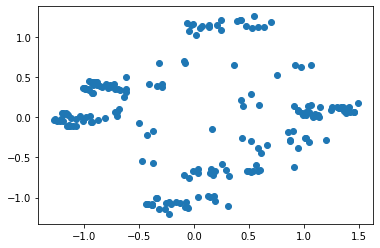

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
r2 = pca.transform(X_train)


plt.scatter(r2[:,0], r2[:,1])

**1. Decision Tree**

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
dtree_predictions = dtree.predict(X_test)

In [28]:
print(classification_report(y_test,dtree_predictions))


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        54
           1       0.67      0.80      0.73        46

    accuracy                           0.73       100
   macro avg       0.74      0.74      0.73       100
weighted avg       0.74      0.73      0.73       100



In [29]:
def rate(pred):
    cfm = confusion_matrix(y_test, pred)
    cfm = cfm.astype(np.float)
    total=sum(sum(cfm))
    sensitivity = cfm[0,0]/(cfm[0,0]+cfm[1,0])
    specificity = cfm[1,1]/(cfm[1,1]+cfm[0,1])
    accuracy = (cfm[0,0]+cfm[1,1])/total
    dt={
        "Accuracy": accuracy,
        "Sensivity": sensitivity,
        "Specificity": specificity
    }    
    return dt

In [30]:
dtree_report=pd.DataFrame(rate(dtree_predictions), index=['Decision Tree'])
dtree_report

,Accuracy,Sensivity,Specificity
Decision Tree,0.73,0.8,0.672727


**2. Random Forest**

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2,sex_1,fbs_1,restecg_1,restecg_2,exang_1
20,0.625000,0.386792,0.246575,0.687023,0.080645,0.00,0,0,0,0,0,1,1,0,1,0,1,0,0
38,0.750000,0.575472,0.326484,0.587786,0.129032,0.00,0,1,0,0,1,0,0,1,0,0,1,0,0
167,0.687500,0.433962,0.324201,0.679389,0.580645,0.50,0,0,0,0,1,0,0,0,0,0,0,0,0
100,0.270833,0.509434,0.269406,0.816794,0.129032,0.50,0,0,1,0,1,0,0,1,1,0,0,0,0
111,0.583333,0.528302,0.000000,0.778626,0.032258,0.25,0,1,0,0,0,1,0,1,1,1,1,0,0


In [33]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
cross_val_score(rfc, X_train,y_train,cv=10)

array([0.85714286, 0.76190476, 0.85714286, 0.95      , 0.85      ,
       0.95      , 0.8       , 0.85      , 0.85      , 0.75      ])

In [35]:
rfc_predictions = rfc.predict(X_test)

In [36]:
print(classification_report(y_test,rfc_predictions))


              precision    recall  f1-score   support

           0       0.89      0.61      0.73        54
           1       0.67      0.91      0.77        46

    accuracy                           0.75       100
   macro avg       0.78      0.76      0.75       100
weighted avg       0.79      0.75      0.75       100



In [37]:
rfc_report=pd.DataFrame(rate(rfc_predictions),index=['Random Forest'])


**3. Support Vector Machine**

In [38]:
from sklearn.svm import SVC

In [39]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
svc_predictions = svc_model.predict(X_test)

In [41]:
print(classification_report(y_test,svc_predictions))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        54
           1       0.71      0.91      0.80        46

    accuracy                           0.79       100
   macro avg       0.81      0.80      0.79       100
weighted avg       0.81      0.79      0.79       100



In [42]:
svc_report=pd.DataFrame(rate(svc_predictions),index=['Support Vector Machine'])
svc_report

,Accuracy,Sensivity,Specificity
Support Vector Machine,0.79,0.902439,0.711864


**4. K-Nearest neighbor (KNN)**

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

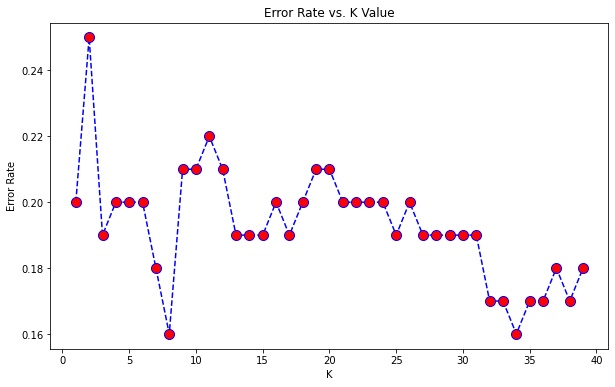

In [45]:

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
knn = KNeighborsClassifier(n_neighbors=34)

knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

In [47]:
print('WITH K=34')
print('\n')
print(classification_report(y_test,knn_predictions))

WITH K=34


              precision    recall  f1-score   support

           0       0.88      0.81      0.85        54
           1       0.80      0.87      0.83        46

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



In [48]:
knn_report=pd.DataFrame(rate(knn_predictions),index=['K_Nearest Neighbor'])


**5. Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
log_predictions = logmodel.predict(X_test)

In [52]:
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        54
           1       0.72      0.91      0.81        46

    accuracy                           0.80       100
   macro avg       0.81      0.81      0.80       100
weighted avg       0.82      0.80      0.80       100



In [53]:
log_predictions

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [54]:
log_report=pd.DataFrame(rate(log_predictions),index=['Logistic Regression'])
log_report

,Accuracy,Sensivity,Specificity
Logistic Regression,0.8,0.904762,0.724138


**6. Naive Bayes**

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
gnb_predictions=gnb.predict(X_test)

In [58]:
print(classification_report(y_test,gnb_predictions))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        54
           1       0.71      0.91      0.80        46

    accuracy                           0.79       100
   macro avg       0.81      0.80      0.79       100
weighted avg       0.81      0.79      0.79       100



In [59]:
gnb_report=pd.DataFrame(rate(gnb_predictions),index=['Naives Bayes'])
gnb_report

,Accuracy,Sensivity,Specificity
Naives Bayes,0.79,0.902439,0.711864


**7. Artificial Neural Network**

In [60]:
from tensorflow import keras
from tensorflow.keras import layers


In [61]:
X_train.shape

(203, 19)

In [62]:
model = keras.Sequential([
    layers.Dense(13, activation='relu', input_shape=[19]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu'), 
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(2, activation='relu'), 
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])

In [63]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [64]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=20,
    epochs=250,
    verbose=0, # hide the output because we have so many epochs
)

In [65]:
history_df = pd.DataFrame(history.history)
history_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.789268,0.482759,0.646215,0.57
1,0.825431,0.497537,0.637043,0.71
2,0.733547,0.556650,0.632671,0.75
3,0.730058,0.586207,0.632417,0.79
4,0.648780,0.600985,0.631769,0.76
...,...,...,...,...
245,0.440845,0.763547,0.460141,0.76
246,0.443839,0.758621,0.462915,0.76
247,0.433892,0.758621,0.462542,0.76
248,0.470142,0.753695,0.464018,0.76


Best Validation Loss: 0.4565
Best Validation Accuracy: 0.7900


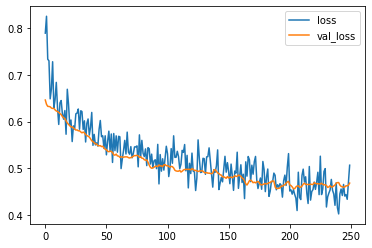

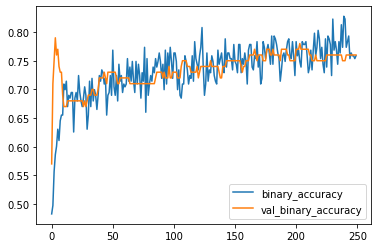

In [66]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))


In [67]:
ann_predictions = model.predict(X_test)
rounded = [int(round(x[0])) for x in ann_predictions]


In [68]:
ann_report=pd.DataFrame(rate(rounded),index=['Neural Network'])
ann_report

,Accuracy,Sensivity,Specificity
Neural Network,0.76,0.916667,0.671875


In [69]:
performance_rate=pd.concat([dtree_report, rfc_report, svc_report, knn_report,gnb_report,ann_report,log_report])
performance_rate

,Accuracy,Sensivity,Specificity
Decision Tree,0.73,0.800000,0.672727
Random Forest,0.75,0.891892,0.666667
Support Vector Machine,0.79,0.902439,0.711864
K_Nearest Neighbor,0.84,0.880000,0.800000
Naives Bayes,0.79,0.902439,0.711864
Neural Network,0.76,0.916667,0.671875
Logistic Regression,0.80,0.904762,0.724138


Text(0.5, 1.0, 'Performance of different classifiers on full features')

<Figure size 432x288 with 0 Axes>

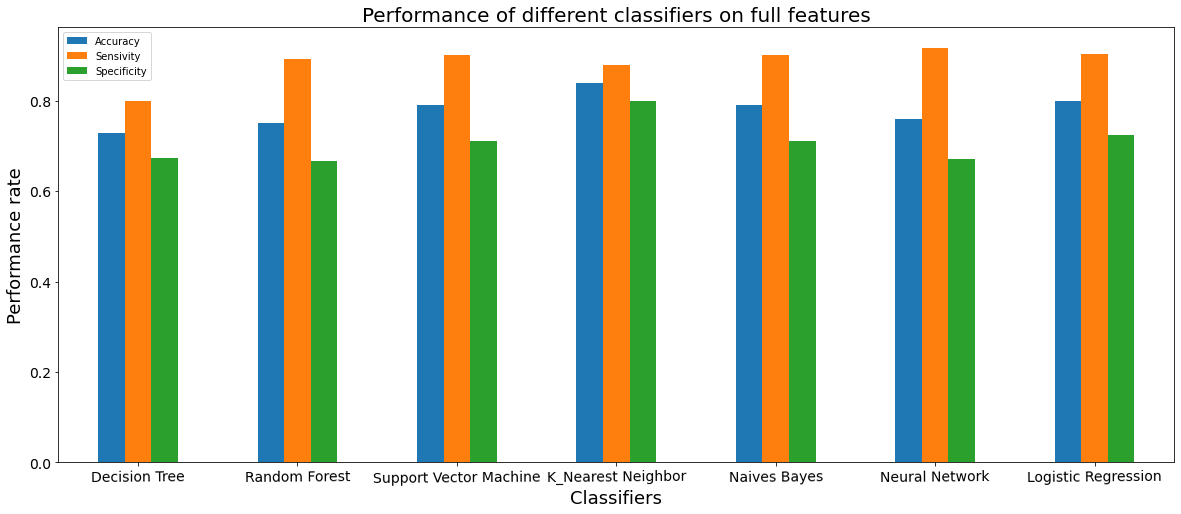

In [73]:
plt.figure()
performance_rate.plot.bar(figsize=(20,8),fontsize=14,rot=0.5)
plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Performance rate',fontsize=18)
plt.title('Performance of different classifiers on full features',fontsize=20)

